In [22]:
import sys

sys.path.append("...")

import Essentials

In [23]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Path/To/Graphviz/bin'

In [24]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
from sklearn.tree import plot_tree

In [25]:
data_archive = np.load('Data_First_newest.npz', allow_pickle=True)

In [26]:
def prepare_Y(y):
    timestamp = y[:, 1]   
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

In [27]:
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

In [28]:
df_X1 = pd.read_csv(r'raw_X1.csv', index_col=0)
df_X2 = pd.read_csv(r'raw_X2.csv', index_col=0)
df_X3 = pd.read_csv(r'raw_X3.csv', index_col=0)
df_Y1 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y2 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y3 = pd.read_csv(r'raw_Y1.csv', index_col=0)

In [29]:
column_names_X1 = df_X1.columns.tolist()
column_names_X2 = df_X2.columns.tolist()
column_names_X3 = df_X3.columns.tolist()
column_name_Y1 = 'Давление насыщенных паров в зимний период'
column_name_Y2 = 'Конец кипения легкого бензина'
column_name_Y3 = 'Содержание олефинов в продукте'

In [30]:
column_names_X1.pop()

'DateTime'

In [31]:
feature_names_1 = column_names_X1
feature_names_2 = column_names_X2
feature_names_3 = column_names_X3

In [32]:
feature_names_2

['Расход бензина ККР на установку',
 'Расход нафты ККР на установку',
 'Расход бензина на рециркуляцию от Е-1205',
 'Температура бензина ККР на установку',
 'Расход сырья после Р-1101',
 'Показатель соотношения водород к углероду',
 'Расход водорода на смешение перед Е-1101',
 'Температура сырья перед Е-1101',
 'Давление сырья перед Е-1101',
 'Температура сырья после Е-1103',
 'Температура бензина перед Е-1102',
 'Давление бензина после Е-1102',
 'Давление на входе в R-1101',
 'Температура на входе в R-1101',
 'Перепад давления реактора R-1101',
 'Температура на входе в С-1101',
 'Давление верха С-1101',
 'Температура 2-ой тарелки С-1101',
 'Расход ЛБ от С-1101',
 'Температура ЛБ от С-1101',
 'Температура 9-ой тарелки С-1101',
 'Температура куба С-1101',
 'Уровень куба С-1101',
 'Расход ТБ с куба С-1101',
 'Расход пара на ребойлеры Е-1105',
 'Температура пара на ребойлеры Е-1105',
 'Давление ЛБ после АВО А-1101',
 'Температура ЛБ после АВО А-1101',
 'Давление в емкости V-1102',
 'Урове

In [33]:
x_train, x_test, y_train, y_test = train_test_split(all_X_1, all_Y_1, test_size=0.25, random_state=42)

In [34]:
y_train, timestamp_train = prepare_Y(y_train)

In [35]:
y_test, timestamp_test = prepare_Y(y_test)

In [36]:
all_X_1.shape
all_Y_1.shape
x_train.shape
y_test.shape

(33, 1)

In [37]:
class RandomForest(Essentials.SoftSensor):
    def __init__(self, x_train, y_train, **kwargs):
        super().__init__('Test')
        self.parameters = kwargs
        self.model = RandomForestRegressor(**self.parameters)
        self.x_scaler = StandardScaler() 
        self.y_scaler = StandardScaler()
        self.x_scaler.fit(x_train)
        self.y_scaler.fit(y_train)
        self.train(x_train, y_train)
        
    
    def preprocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err
    def postprocessing(self, x):
        return x
                
    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions.reshape(-1, 1)

    def train(self, x_train, y_train):
        x_train = self.preprocessing(x_train)
        self.model.fit(x_train, y_train)
        self.set_model(self.model)

    def tree_viz(self, feature_names):
        random_tree = self.model.estimators_[0]
        plt.figure(figsize=(10, 8))
        plot_tree(random_tree, feature_names=feature_names, class_names=None, filled=True)
        plt.show()
        
    def __str__(self):
        pass
    def predict(self, x):
        return self.evaluate_model(self.preprocessing(x))

In [38]:
test_soft_sensor = RandomForest(x_train, y_train, n_estimators=100, max_depth=8, min_samples_split= 3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24468\3500379576.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(x_train, y_train)


In [39]:
metric = Essentials.R2Metric()

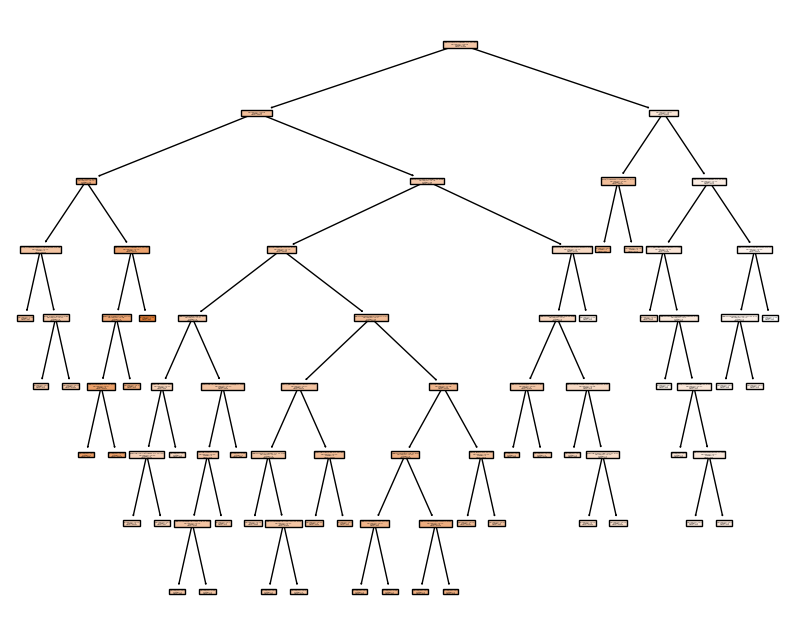

In [40]:
test_soft_sensor.tree_viz(feature_names_1)

In [41]:
test_soft_sensor.test(x_test, y_test, metric)

(array([[58.3245636 ],
        [58.60752266],
        [55.31209048],
        [58.68144771],
        [59.41854727],
        [57.53530947],
        [59.38270422],
        [51.61462857],
        [61.47567857],
        [58.68486107],
        [54.06456861],
        [58.14329295],
        [59.08829196],
        [54.58911786],
        [53.16752698],
        [52.46512381],
        [59.55634206],
        [62.90287143],
        [58.20912294],
        [58.375992  ],
        [55.88439768],
        [55.38100714],
        [59.37528303],
        [57.49010674],
        [58.19719354],
        [61.97758333],
        [59.29860636],
        [59.13070636],
        [62.5647381 ],
        [52.49459329],
        [57.79432044],
        [59.38218706],
        [58.47729365]]),
 0.6387300213046601)

In [42]:
test_visual = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'RandomForest SoftSensor R2 metric on Test')

      Coefficient of determination
Test                       0.63873


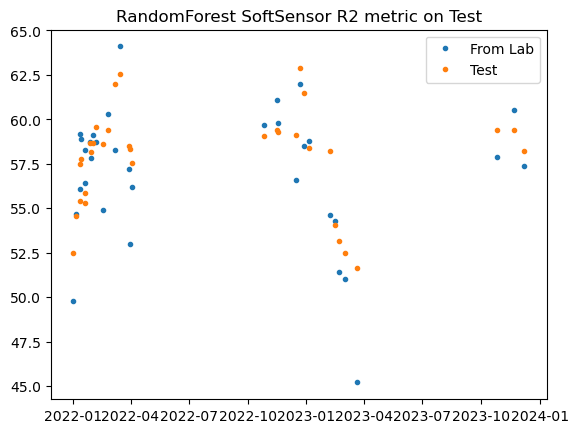

In [43]:
test_visual.visualize([test_soft_sensor])

In [44]:
PCA_LR_test_visual_train = Essentials.Visualizer(x_train, y_train, timestamp_train, [metric], 'RandomForest SoftSensor R2 metric on Train')

      Coefficient of determination
Test                       0.95176


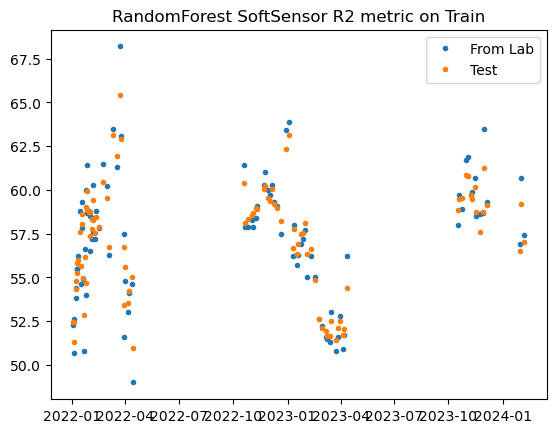

In [45]:
PCA_LR_test_visual_train.visualize([test_soft_sensor])